<a href="https://colab.research.google.com/github/SocialHealthAI/Education/blob/main/Logistic_Regression_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd               # tabular data
import numpy as np                # numerical computing
import matplotlib.pyplot as plt   # plots
# magic to embed plots in notebook
%matplotlib inline                
import seaborn as sns             # more matplotlib visualizations

Get the demo data set - titanic data to predict survival.  Creates a panda dataframe


In [2]:
titanic_data = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')


In [3]:
titanic_data.info()
titanic_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   survived            627 non-null    int64  
 1   sex                 627 non-null    object 
 2   age                 627 non-null    float64
 3   n_siblings_spouses  627 non-null    int64  
 4   parch               627 non-null    int64  
 5   fare                627 non-null    float64
 6   class               627 non-null    object 
 7   deck                627 non-null    object 
 8   embark_town         627 non-null    object 
 9   alone               627 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 49.1+ KB


,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Pair plot to see distributions and correlations. Color by class



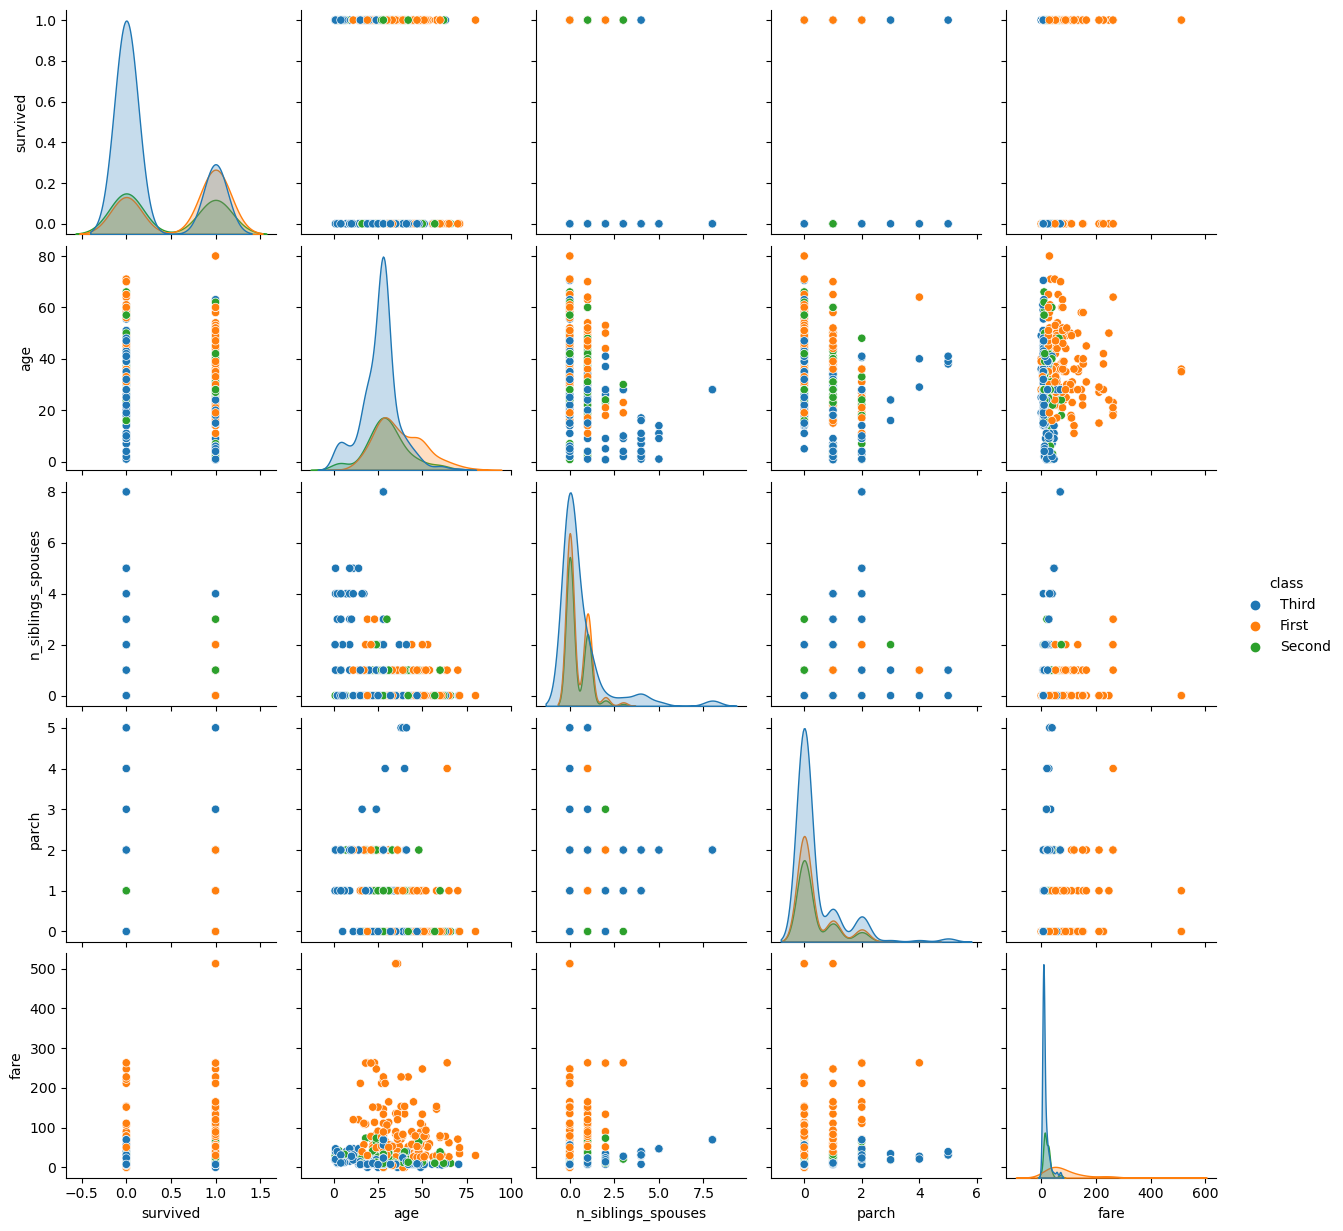

In [5]:
sns.pairplot(titanic_data, hue="class")

Cleaning data.

  No NULLs with heatmap.  To drop columns with mssing data:
    titanic_data.dropna(inplace = True)
  To keep columns with NULLS, see imputation.

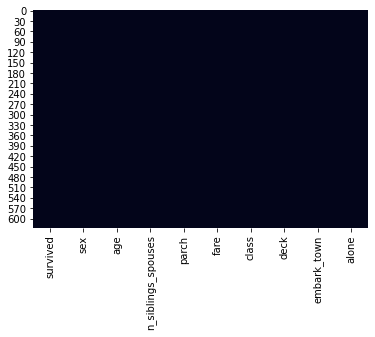

In [49]:
sns.heatmap(titanic_data.isnull(), cbar=False)

Cleaning data:
  Review counts of column values.  For categorical columns:
    <br>for sex, embark_town, alone use get_dummies()
    <br>remove deck, too many nulls
    <br>remove unknown, only one value
    <br>create numeric column for class


In [50]:
for column in titanic_data:
  print(titanic_data[column].value_counts())
  print ("\n")

0    384
1    243
Name: survived, dtype: int64


male      410
female    217
Name: sex, dtype: int64


28.0    155
24.0     21
22.0     18
36.0     18
30.0     17
       ... 
56.0      1
28.5      1
20.5      1
64.0      1
70.5      1
Name: age, Length: 76, dtype: int64


0    422
1    153
2     18
4     13
3     11
8      6
5      4
Name: n_siblings_spouses, dtype: int64


0    476
1     85
2     56
5      4
4      3
3      3
Name: parch, dtype: int64


7.8958      31
8.0500      28
13.0000     27
7.7500      24
26.0000     21
            ..
211.5000     1
40.1250      1
50.4958      1
221.7792     1
19.9667      1
Name: fare, Length: 216, dtype: int64


Third     341
First     159
Second    127
Name: class, dtype: int64


unknown    481
C           43
B           37
E           23
D           22
A           11
F            6
G            4
Name: deck, dtype: int64


Southampton    450
Cherbourg      123
Queenstown      53
unknown          1
Name: embark_town, dtype: int64


y    372


In [51]:
sex_data = pd.get_dummies(titanic_data['sex'], drop_first = True)
titanic_data = pd.concat([titanic_data, sex_data], axis = 1)
titanic_data.drop(['sex'], axis = 1, inplace = True)
                  
embark_data = pd.get_dummies(titanic_data['embark_town'], drop_first = True)
titanic_data = pd.concat([titanic_data, embark_data], axis = 1)
titanic_data.drop(['embark_town'], axis = 1, inplace = True)
                  
alone_data = pd.get_dummies(titanic_data['alone'], drop_first = True)
titanic_data = pd.concat([titanic_data, alone_data], axis = 1)
titanic_data.drop(['alone'], axis = 1, inplace = True)

titanic_data.drop(['deck'], axis = 1, inplace = True)
titanic_data.drop(['unknown'], axis = 1, inplace = True)

titanic_data['class'] = np.where(titanic_data['class'] == 'First', 1, 
                         np.where(titanic_data['class'] == 'Second', 2, 3
                         )                          
                      )



Split into training and test data


In [52]:


y_data = titanic_data['survived']
x_data = titanic_data.drop('survived', axis = 1)

from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

Define a linear regression model and show coefficients

In [53]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga', max_iter=8000)
model.fit(x_training_data, y_training_data)
print (model.coef_)


[[ 0.00536325 -0.27188299  0.10899949  0.01189044 -0.15682396 -1.33115784
   0.1012392  -0.14421235 -0.1550611 ]]


scilearn does not have p-values for logistic regression so do the same with statsmodels

In [54]:
#x_training_data.corr()

import statsmodels.api as sm
model_logit = sm.Logit(y_training_data, x_training_data).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.456472
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  438
Model:                          Logit   Df Residuals:                      429
Method:                           MLE   Df Model:                            8
Date:                Tue, 14 Sep 2021   Pseudo R-squ.:                  0.3059
Time:                        14:49:21   Log-Likelihood:                -199.93
converged:                       True   LL-Null:                       -288.05
Covariance Type:            nonrobust   LLR p-value:                 6.349e-34
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.0144      0.009      1.559      0.119      -0.004       0.033
n_siblings_spouses    -0.2903      0.167     -1.735      0.083      -0.618       0.038
parch                 -0.0126      0.180     -0.070      0.944      -0.366       0.340
fare                   0.0151      0.004      3.942      0.000       0.008       0.023
class                 -0.0497      0.147     -0.337      0.736      -0.339       0.239
male                  -2.5759      0.281     -9.182      0.000      -3.126      -2.026
Queenstown             0.4029      0.553      0.728      0.467      -0.682       1.488
Southampton            0.1176      0.340      0.346      0.730      -0.549       0.784
y                      0.1452      0.371      0.392      0.695      -0.581       0.871
======================================================================================
"""

Predictions based on test data.  38.7% survived so we will create a threshold classificatioms of 1 for probabilitu > .39.  <br><br>Precision - % of predictions that are correct TP/(TP + FP). <br>Recall - % of positives that are correctly predicted TP(TP + FN)

In [55]:
predictions = model_logit.predict(x_test_data)

# to see all the predictions set options for single statement like this
#with pd.option_context('display.max_rows', None,
#'display.max_columns', None,
#'display.precision', 3,
#):
#  print(predictions)

predictions_class = np.where(predictions > .39, 1, 0)

from sklearn.metrics import classification_report
classification_report(y_test_data, predictions_class)


'              precision    recall  f1-score   support\n\n           0       0.77      0.91      0.83       107\n           1       0.84      0.65      0.73        82\n\n    accuracy                           0.79       189\n   macro avg       0.81      0.78      0.78       189\nweighted avg       0.80      0.79      0.79       189\n'

ROC Curve

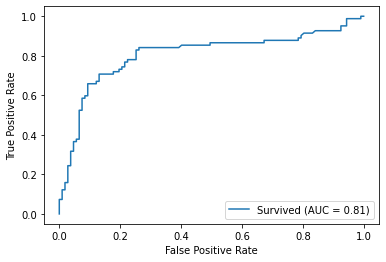

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_test_data, predictions)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc(fpr, tpr), estimator_name = "Survived").plot()